Name: Yeo Chee En Luke </br>
Student Number:  46746267, S4674626 </br>
DATA2001 Assignment 2 :Insight </br> 

# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [2]:
#Read the dataset provided
data = pd.read_csv(filepath_or_buffer ="dataset.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
2,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
3,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...
4,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...


**Column Descriptions** </br>
**Id** – review id </br>
**ProductId** – id of the product </br>
**UserId** – id of the user </br>
**ProfileName** – name of the user </br>
**HelpfulnessNumerator** – fraction of users who found the review helpful (numerator part) </br>
**HelpfulnessDenominator** – fraction of users who found the review helpful (denominator part) </br>
**Score** – rating of the product </br>
**Time** – time of the review (in unix time) </br>
**Summary** – review summary </br>
**Text** – text of the revie

In [3]:
#getting the number of row and columns
data.shape

(30365, 10)

In [4]:
#Overview of info in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30365 entries, 0 to 30364
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      30365 non-null  int64 
 1   ProductId               30365 non-null  object
 2   UserId                  30365 non-null  object
 3   ProfileName             30363 non-null  object
 4   HelpfulnessNumerator    30365 non-null  int64 
 5   HelpfulnessDenominator  30365 non-null  int64 
 6   Score                   30365 non-null  int64 
 7   Time                    30365 non-null  int64 
 8   Summary                 30365 non-null  object
 9   Text                    30365 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.3+ MB


In [5]:
#making data into only 3 columns : Id, Score, Text
data = data[['Id', 'Score', 'Text']]
data.head()

,Id,Score,Text
0,2,1,Product arrived labeled as Jumbo Salted Peanut...
1,5,5,Great taffy at a great price. There was a wid...
2,10,5,This is a very healthy dog food. Good for thei...
3,17,2,I love eating them and they are good for watch...
4,39,4,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...


In [6]:
#Create the column label
data['Label']=  data['Score']

#Check the num of values in label
data['Label'].value_counts()

5    19354
4     3874
1     3162
3     2311
2     1664
Name: Label, dtype: int64

In [7]:
data['Label'].unique()

array([1, 5, 2, 4, 3], dtype=int64)

In [8]:
#remove the dataset that has score value of 3
data.drop(data[data['Label'] == 3].index,inplace=True)
data['Label'].unique()

array([1, 5, 2, 4], dtype=int64)

In [9]:
#Make the dataset into strings than integers
data['Label'] = data['Label'].apply(str)

In [10]:
#replace scores with positive: "pos" or negative : "neg"
score_replacement = {'1':"neg", 
                     '2':"neg", 
                     '4':"pos",
                     '5':"pos"}

# perform replacement
data['Label'] = data['Label'].replace(score_replacement)

# verify that gender values are now consistent
data['Label'].unique()


array(['neg', 'pos'], dtype=object)

In [11]:
data['Label'].value_counts()

pos    23228
neg     4826
Name: Label, dtype: int64

# 2. Data Cleaning 

Exploring couple of text from the data

In [12]:
#Example of data that has <br />
data.loc[21, "Text"]

'I drink this tea plain (without sugar or milk), and it has a pleasant aroma.<br /><br />The price from Amazon is cheaper than my local grocery store.  One reviewer is right, I think it has some herbal smell to make up the aroma.  So the label "Imperial Blend" kind of implied the herb.<br /><br />I am not exactly a black tea drinker, so this tea is a surprise, and affordable too.  I usually prefer White Chinese tea, like White Peony, but it is more expensive, and requires lower temperature water.  But this is black tea, and this aroma kind of remind me the \'softness\' of white tea.'

In [13]:
#Example of data that has a website link , hyperlink
data.loc[520, "Text"]

'<a href="http://www.amazon.com/gp/product/B00769ZSVO">180 Snacks Almond Pops With Cranberries 17 oz Value Bag</a><br /><br />I have Celiac Disease, and while shopping I picked up a bag of these snacks because they are gluten free. So YUMMY, I had to have more and found them on Amazon and ordered 3 bags.I will be saving them for our trip south for the winter. They are absolutely the best!!'

In [14]:
#Example of data that is in cap
data.loc[4, "Text"]

'I WAS VISITING MY FRIEND NATE THE OTHER MORNING FOR COFFEE , HE CAME OUT OF HIS STORAGE ROOM WITH ( A PACKET OF McCANNS INSTANT IRISH OATMEAL .) HE SUGGESTED THAT I TRY IT FOR MY OWN USE ,IN MY STASH . SOMETIMES NATE DOSE NOT GIVE YOU A CHANCE TO SAY NO , SO I ENDED UP TRYING THE APPLE AND CINN . FOUND IT TO BE VERY TASTEFULL WHEN MADE WITH WATER OR POWDERED MILK . IT GOES GOOD WITH O.J. AND COFFEE AND A SLICE OF TOAST AND YOUR READY TO TAKE ON THE WORLD...OR THE DAY AT LEAST..  JERRY REITH...'

In [15]:
data.loc[31, "Text"]

'service was great, but I meant to buy Swiss Chalet chicken SAUCE not the Marinade :)<br /><br />Love the sauce - have yet to try the marinade'

**Observation**

It can be observed that a tweet can contain hyperlinks, hashtags, @mentions and also some weired characters. However, they are not useful as we are only interested in the text hence removing them.

In [16]:
import re

# define a function to clean a tweet
def clean_data(text):
    
    # remove hyper-links
    text = re.sub(r"https:[\S]+", " ", text)
    
    # remove website-links:
    text = re.sub(r"<a [\S]+>", " ", text)
    # remove new line characters (\n)
    text = re.sub(r"\\n"," ", text)
    
    # remove any weired characters
    text = re.sub(r"[^A-Za-z*'-]+", " ", text)
    
    # remove hash-tags
    # write appropriate regular expression
    text = re.sub(r"#[\S]+", " ", text)
    
    # remove @-mentions
    # write appropriate regular expression
    text = re.sub(r"@[\S]+", " ", text)
    
    # remove </br>-mentions
    # write appropriate regular expression
    text = re.sub(r"br", " ",text)
    text = re.sub(r"</a>", " ",text)
    # convert tweet text to lowercase
    text = text.lower().strip()
    
    return text

In [17]:
#apply the cleaning to the dataset
data["Text"] = data["Text"].apply(clean_data)

In [18]:
data.loc[21, "Text"]

"i drink this tea plain without sugar or milk and it has a pleasant aroma     the price from amazon is cheaper than my local grocery store one reviewer is right i think it has some herbal smell to make up the aroma so the label imperial blend kind of implied the herb     i am not exactly a black tea drinker so this tea is a surprise and affordable too i usually prefer white chinese tea like white peony but it is more expensive and requires lower temperature water but this is black tea and this aroma kind of remind me the 'softness' of white tea"

In [19]:
data.loc[520, "Text"]

'snacks almond pops with cranberries oz value bag a     i have celiac disease and while shopping i picked up a bag of these snacks because they are gluten free so yummy i had to have more and found them on amazon and ordered bags i will be saving them for our trip south for the winter they are absolutely the best'

In [20]:
data.loc[4, "Text"]

'i was visiting my friend nate the other morning for coffee he came out of his storage room with a packet of mccanns instant irish oatmeal he suggested that i try it for my own use in my stash sometimes nate dose not give you a chance to say no so i ended up trying the apple and cinn found it to be very tastefull when made with water or powdered milk it goes good with o j and coffee and a slice of toast and your ready to take on the world or the day at least jerry reith'

In [21]:
data.loc[31, "Text"]

'service was great but i meant to buy swiss chalet chicken sauce not the marinade     love the sauce - have yet to try the marinade'

# 3. Linear Regression (text classifier)

## 3.1 Data Analysis 

In this step, i will fit a logistic regression model to predict whether a tweet has positive or negative sentiment. But before that, i am spliting the data into train and test set. Train set data will be used to develop a text classification model and test set data will be used to evaluate the model.

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

# define random state to make random processes reproducible
random_state = np.random.RandomState(0)

In [23]:
#Set what is X and what is Y 
X = data["Text"]
y = data["Label"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Luke
[nltk_data]     Yeo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# define stop words
stop_words = stopwords.words('english')

In [26]:
# define CountVectorizer object
# min_df=0.01 means words that belong to only 1% of the all tweets will be excluded in the BOW
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)
# vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# fit the vectorizer object to train data
vectorizer.fit(X_train)

# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)


In [27]:
# visualize BOW
training_data_BOW = pd.DataFrame(data=X_train_BOW.toarray(), columns=vectorizer.get_feature_names_out()).T
# display the first few rows of the dataframe
training_data_BOW.head(5)

,0,1,2,3,4,5,6,7,8,9,...,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
actually,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
add,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
added,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.2 Baseline Model

In [28]:
from sklearn.linear_model import LogisticRegression
# define lgositic regression model object
log_reg = LogisticRegression(random_state=random_state)

# fit the model to training data
log_reg.fit(X_train_BOW, y_train)

LogisticRegression(random_state=RandomState(MT19937) at 0x2272E340F40)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [30]:
# identify most frequently occurring sentiment in the train data
y_train.value_counts()

pos    16234
neg     3403
Name: Label, dtype: int64

In [31]:
# assign 'Pos' to test data 
y_test_baseline_predictions = pd.Series(['pos']*len(y_test))

## Confusion matrix of Baseline Model

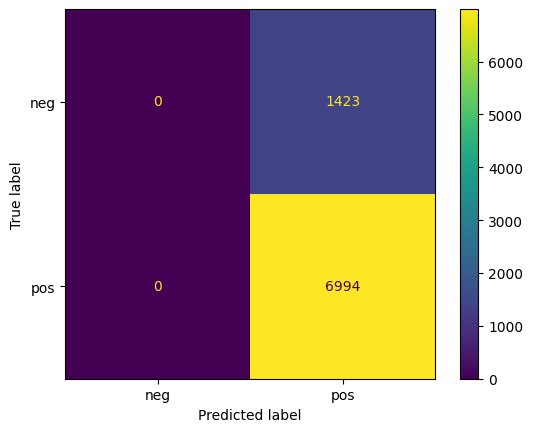

In [32]:
cm = confusion_matrix(y_test,y_test_baseline_predictions )
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

Let's interpret the baseline confusion matrix and derieve some useful metrics. Here,
* Model correctly identified 0 negative sentiment tweets as negative. (True Negative - TN)
* Model correctly identified 6994 positive sentiment tweets as positive. (True Positive - TP)
* Model incorrectly identified 0 positive sentiment tweets as negative. (False Negative - FN)
* Model incorrectly identified 1423 negative sentiment tweets as positive. (False Positive - FP)

## 3.3 logisticregression

In [33]:
# make prediction on test data

# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(X_test_BOW)

# view the predictions
y_test_log_reg_predictions

array(['pos', 'pos', 'pos', ..., 'pos', 'neg', 'pos'], dtype=object)

## Confusion matrix Logistic regression

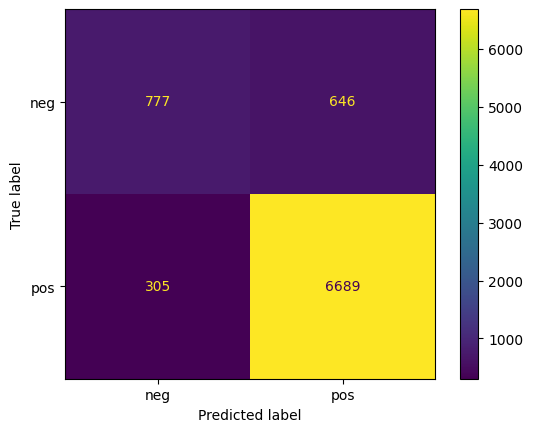

In [34]:
cm = confusion_matrix(y_test, y_test_log_reg_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
display.plot();

Let's interpret the logisticregression confusion matrix and derieve some useful metrics. Here,
* Model correctly identified 777 negative sentiment tweets as negative. (True Negative - TN)
* Model correctly identified 6689 positive sentiment tweets as positive. (True Positive - TP)
* Model incorrectly identified 305 positive sentiment tweets as negative. (False Negative - FN)
* Model incorrectly identified 646 negative sentiment tweets as positive. (False Positive - FP)

### Summary

1) Split the data into training and test set. </br>
2) Change the text to numerical using BOW to let the logistic regression model read the "text" numerically </br>
3) Let the model learn using the training set first then test it aftewards using the test set

In [35]:
report = classification_report(y_test, y_test_log_reg_predictions, target_names=log_reg.classes_)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         neg       0.72      0.55      0.62      1423
         pos       0.91      0.96      0.93      6994

    accuracy                           0.89      8417
   macro avg       0.82      0.75      0.78      8417
weighted avg       0.88      0.89      0.88      8417



# 4. Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## 4.1 Baseline model evaluation

### Accuracy 

In [37]:
accuracy_score(y_test, y_test_baseline_predictions)

0.8309373886182726

### Precision 

Precison = TN/(TN+FN) </br>
Precison = 0.0/(0.0+0.0) = 0.0

### Recall

In [38]:
# Recall = TN/(TN+FP)
0/(0+1423)

0.0

### F1-Score

In [39]:
# Baseline model F1-score for positive 
f1_score(y_test, y_test_baseline_predictions, pos_label='pos')

0.9076633573421582

In [40]:
# Baseline model F1-score for negative
f1_score(y_test, y_test_baseline_predictions, pos_label='neg')

0.0

formular:
F1 = 2 * (precision * recall) / (precision + recall) </br>

2 * (0 * 0.0) / (0 + 0.0) = 0.0

### Result
Baseline: {‘accuracy’:0.8309373886182726, ‘precision’:0.0, ’recall’:0.0, ‘f1-score’:0.0}

**Explain the cause of difference between the accuracy and the f1 
score of the negative class for the baseline model.** 

The cause of the different is because the accuracy takes both the positive and negative results while the f1-score only takes the negative results which is 0 as the baseline is set to all positive and the precision,recall are 0.0.

## 4.2 logisticregression Evaluation

### Accuracy 

In [41]:
accuracy_score(y_test, y_test_log_reg_predictions)

0.8870143756682903

In [42]:
from sklearn.model_selection import cross_val_score

# find accuracy of model using 3-fold cross validation
cross_val_score(LogisticRegression(), X_train_BOW, y_train, cv=5).mean()

0.8816523887836935

### Precision

In [43]:
# Precison = TN/(TN+FN)
777/(777+305)

0.7181146025878004

### Recall

In [44]:
# Recall = TN/(TN+FP)
777/(777+646)

0.5460295151089248

### F1-Score

In [45]:
f1_score(y_test, y_test_log_reg_predictions, pos_label='pos')

0.9336310977737456

In [46]:
f1_score(y_test, y_test_log_reg_predictions, pos_label='neg')

0.6203592814371258

In [47]:
#F1 = 2 * (precision * recall) / (precision + recall)

2 * ( 0.7181146025878004 * 0.5460295151089248) / ( 0.7181146025878004 + 0.5460295151089248 )

0.6203592814371258


### Result
Logisticregression: {‘accuracy’:0.8870143756682903, ‘precision’:0.7181146025878004, ’recall’:0.5460295151089248 , ‘f1-score’:0.6203592814371258}

## Comparing Logistic regression model and baseline model


From the calculations above , the logistic regression model is more accurate with 88%, comparing to baseline model with 83%. 

Hence the logistic regression model is better to be used for prediction


# 5. Prediction using model

In [48]:
data2 = pd.read_csv(filepath_or_buffer ="predictdata.csv")
data2.head()

,Id,Text
0,1,"The candy is tasty, but they totally scam you ..."
1,2,I had been looking for the violet candy with t...
2,3,these are very pricey so i only enjoy them now...
3,4,"These candies have a mild flavor, when compare..."
4,5,This product is a bit pricey for the amt. rece...


In [49]:
#apply the cleaning to the dataset
data2["Text"] = data2["Text"].apply(clean_data)

In [50]:
Z = data2["Text"]
Z_test_BOW = vectorizer.transform(Z)

# predict using log_reg object
y_test_log_reg_predictions = log_reg.predict(Z_test_BOW)

# view the predictions
y_test_log_reg_predictions

array(['pos', 'pos', 'pos', 'pos', 'neg'], dtype=object)

In [51]:
#Create a new column for model predictions
data2['Model_Prediction'] = y_test_log_reg_predictions

#Show the dataframe of data2
data2

,Id,Text,Model_Prediction
0,1,the candy is tasty but they totally scam you o...,pos
1,2,i had been looking for the violet candy with t...,pos
2,3,these are very pricey so i only enjoy them now...,pos
3,4,these candies have a mild flavor when compared...,pos
4,5,this product is a bit pricey for the amt recei...,neg


# 6. Frequent Words

In [52]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

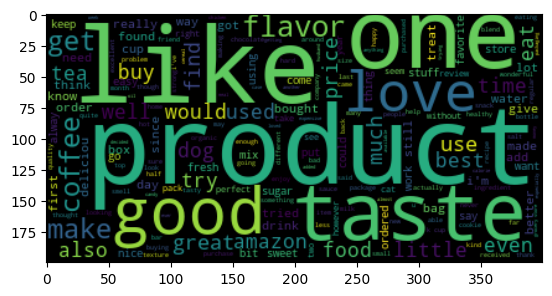

In [53]:
text = " ".join(X_train)
word_cloud = WordCloud(stopwords=set(stop_words)).generate(text)
plt.imshow(word_cloud, interpolation='bilinear');

In [54]:
# function adapted from https://aneesha.medium.com/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
def plot_coefficients(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * top_features), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Important words with their model coefficient")
    plt.show()    

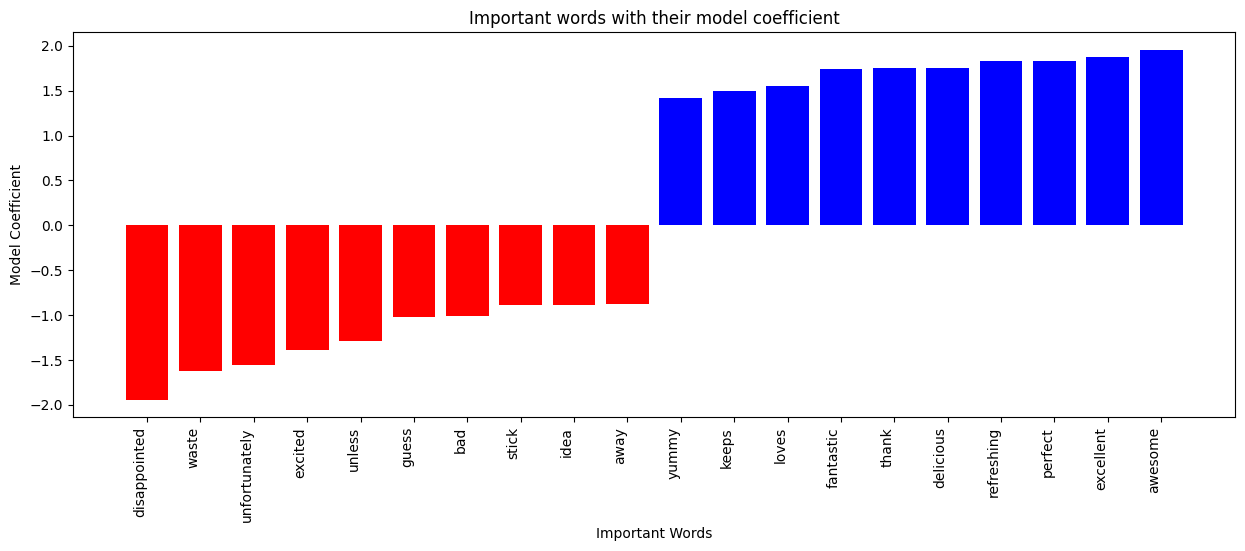

In [55]:
plot_coefficients(log_reg, vectorizer.get_feature_names_out())

Looking at the plot, the words cofficient with the red graph are words that are used to predict negative while blue is positive. Some example of the negative words are 'disappointed', 'wasted', 'unfortunately'and some positive words are 'awesome', 'excellent', 'perfect'.

# 7. Unbalanced data

An issue with unbalance data/ imbalanced classification is that it causes inaccuracy in the prediction/result due to highly unequal distribution of classes. A better way to handle the data is to either use "Under Sample" or "Oversample" technique where the 2 factors have the same amount. Example , having the same number of "pos" and "neg" to have equal distribution.